#Занятие 8. АБ-тестирование (проверяем все в онлайн-экспериментах)

__Взять датасет из google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.__

In [32]:
!wget 'https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_' -O data.zip

--2022-04-13 08:32:21--  https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_
Resolving drive.google.com (drive.google.com)... 173.194.214.138, 173.194.214.113, 173.194.214.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.214.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lc6mr9fd677qjr6eov1kch1h10h0pepd/1649838675000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download [following]
--2022-04-13 08:32:23--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lc6mr9fd677qjr6eov1kch1h10h0pepd/1649838675000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-

In [33]:
!unzip data.zip

Archive:  data.zip
replace marketing description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [62]:
import pandas as pd
import numpy as np

In [156]:
marketing_campaign = pd.read_csv('marketing_campaign.csv')
marketing_campaign

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [157]:
subscribers = pd.read_csv('subscribers.csv')
subscribers

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True
...,...,...,...,...,...
10032,a11032,Email,1/17/18,1/24/18,False
10033,a11033,Email,1/17/18,NaN,True
10034,a11034,Email,1/17/18,NaN,True
10035,a11035,Email,1/17/18,NaN,True


In [158]:
users = pd.read_csv('users.csv')
users

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English
...,...,...,...
10032,a11032,45-55 years,German
10033,a11033,55+ years,German
10034,a11034,55+ years,German
10035,a11035,0-18 years,German


Объеденим 3 датасета в один:

In [159]:
df = marketing_campaign.merge(subscribers, on='user_id').merge(users, on='user_id')
df

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,False,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,0-18 years,German


После объединение данных в один датасет имеем две очень похожие колонки 'language_displayed' и 'language_preferred'. Проверим их на дублирование данных, если значения в обоих колонках полностью совпадают, удалим одну из колонок из итогового датасета.

In [160]:
df.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant',
       'language_displayed', 'converted', 'subscribing_channel',
       'date_subscribed', 'date_canceled', 'is_retained', 'age_group',
       'language_preferred'],
      dtype='object')

In [161]:
df['compare'] = df['language_displayed'] == df['language_preferred']

In [162]:
df['compare'].value_counts()

True     9515
False     522
Name: compare, dtype: int64

Значения в колонках 'language_displayed' и 'language_preferred' совпадают не полностью. Соответственно, оставляем в датасете обе колонки и удаляем временную колонку 'compare'.

In [163]:
df = df.drop('compare', axis=1)

Посмотрим на варианты теста (control/personalization) и конверсию (converted):

In [164]:
df.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

Варианты теста количественно, практически, равны.

Посмотрим на конверсию вообще и отдельно для разных вариантов теста:

In [165]:
df.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [181]:
df[df['variant'] == 'control'].converted.value_counts()

0    4720
1     371
Name: converted, dtype: int64

In [182]:
df[df['variant'] == 'personalization'].converted.value_counts()

0    4241
1     705
Name: converted, dtype: int64

Конверсия больше в варианте теста 'personalization'

Заполним пропуски в колонке 'converted':

In [166]:
df.converted.isna().sum()

15

In [167]:
values = False
df['converted'] = df['converted'].fillna(value=values)
df.converted.isna().sum()

0

Заменим False и True на числовые значения:

In [168]:
binary_to_numbers = {False: 0, True: 1}

df['converted'] = df['converted'].replace(binary_to_numbers)

df.converted.value_counts()

0    8961
1    1076
Name: converted, dtype: int64

Столбец 'converted' - это бинарный показатель, является ли пользователем платящим или нет(состоялась конверсия или нет).

Наиболее очевидным статистическим критерием для нашего случая выглядит z-критерий.

Гипотезы:

нулевая гипотеза: $H_0 : p_1 = p_2$<br>
альтернативная гипотеза: $H_1 : p_1 \neq p_2$

Посчитаем z-критерий "вручную":

In [169]:
z_crit_value = 1.96 # соответствует доверительному интервалу в 95%
k1 = df[df['variant']=='control']['converted'].sum()
n1 = df[df['variant']=='control'].shape[0]
k2 = df[df['variant']=='personalization']['converted'].sum()
n2 = df[df['variant']=='personalization'].shape[0]

k1, n1, k2, n2

(371, 5091, 705, 4946)

In [170]:
grouped = df.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371,5091
personalization,705,4946


Посчитаем выборочные p1, p2:

In [171]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.07287369868395208, 0.14253942579862516)

Посчитаем z-score:

In [172]:
P = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / (P * (1 - P) * (1/n1 + 1/n2))**(1/2)
z

-11.278864170859038

Сравним полученное значение с критическим, выбранным ранее

In [173]:
if abs(z) > z_crit_value:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We may reject the null hypothesis!


Т.е. мы можем отбросить нулевую гипотезу, говорящую что значимых различий в конверсии между двумя вариантами теста нет и принять альтернативную гипотезу, утверждающую что различия в конверсиях значимы.

Еще раз вычисляем z-критерий, но уже воспользуемся возможностями библиотеки:

In [174]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=-11.279 pvalue=0.000


Визуализируем:

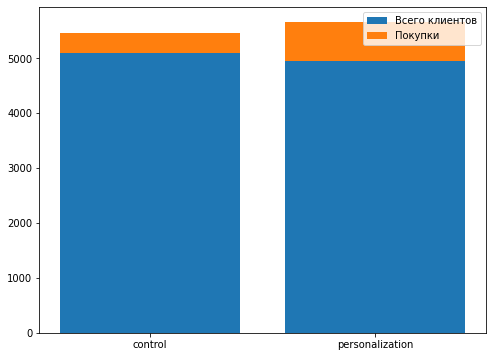

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['converted'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='Покупки')
plt.xticks([1, 2], ['control', 'personalization'])
plt.legend();

Из визуализации также явно заметна значимая разница в конверсиях между двумя вариантами теста.

Посмотрим и непараметрический критерий (хи-квадрат):

In [176]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=127.213 pvalue=0.000


__Выводы:__

Конверсия больше в варианте теста 'personalization', это различие в конверсиях мы можем признать статистически значимым.